Is there a correlation between electricity and natural gas consumption in the Residential sector when their prices are high?

Ha: If electricity consumption increase, consequently, natural gas consumption increases
Ho: There is no correlation between the electricity consumption and the natural gas consumption

-get consumption data for Electricity and Natural gas for Residential

https://www.eia.gov/opendata/commands.php

Vietnam War = 1950s to 70s
Cold War = 1950s

In [1]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

url = 'http://api.eia.gov/series/?api_key='


# Residential Electricity Consumption Annually

In [2]:
#Residential Sector Energy Consumption
#https://www.eia.gov/opendata/qb.php?category=40560&sdid=SEDS.ESRCB.US.A
#OLD:https://www.eia.gov/opendata/qb.php?category=711250&sdid=TOTAL.TERCBUS.A
#OLD:resident_energy = '&series_id=TOTAL.TERCBUS.A'
resident_energy = '&series_id=SEDS.ESRCB.US.A'

In [3]:
response = requests.get(url + api_key + resident_energy).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "SEDS.ESRCB.US.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2017",
                    4703946
                ],
                [
                    "2016",
                    4814530
                ],
                [
                    "2015",
                    4790777
                ],
                [
                    "2014",
                    4801395
                ],
                [
                    "2013",
                    4759099
                ],
                [
                    "2012",
                    4689844
                ],
                [
                    "2011",
                    4854597
                ],
                [
                    "2010",
                    4932757
                ],
                [
                    "2009",
                    4656555
       

In [4]:
response_data = response['series']
data_list = []

for item in response_data:
    data_list.append(item['data'])

In [5]:
data_list[0][2][0]

'2015'

In [6]:
year=[]
energy_consumed=[]

for i in range(len(data_list[0])):
    year.append(data_list[0][i][0])
    energy_consumed.append(data_list[0][i][1])
        


In [8]:
year, energy_consumed

(['2017',
  '2016',
  '2015',
  '2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '2000',
  '1999',
  '1998',
  '1997',
  '1996',
  '1995',
  '1994',
  '1993',
  '1992',
  '1991',
  '1990',
  '1989',
  '1988',
  '1987',
  '1986',
  '1985',
  '1984',
  '1983',
  '1982',
  '1981',
  '1980',
  '1979',
  '1978',
  '1977',
  '1976',
  '1975',
  '1974',
  '1973',
  '1972',
  '1971',
  '1970',
  '1969',
  '1968',
  '1967',
  '1966',
  '1965',
  '1964',
  '1963',
  '1962',
  '1961',
  '1960'],
 [4703946,
  4814530,
  4790777,
  4801395,
  4759099,
  4689844,
  4854597,
  4932757,
  4656555,
  4710818,
  4750326,
  4611386,
  4637683,
  4408241,
  4353111,
  4316794,
  4099882,
  4068627,
  3906478,
  3855932,
  3670903,
  3693530,
  3557015,
  3440939,
  3394192,
  3193423,
  3259884,
  3152752,
  3089650,
  3046459,
  2901600,
  2794729,
  2708902,
  2661673,
  2562235,
  2489120,
  2464367,
  2448086,
 

In [7]:
data_list[0]

[['2017', 4703946],
 ['2016', 4814530],
 ['2015', 4790777],
 ['2014', 4801395],
 ['2013', 4759099],
 ['2012', 4689844],
 ['2011', 4854597],
 ['2010', 4932757],
 ['2009', 4656555],
 ['2008', 4710818],
 ['2007', 4750326],
 ['2006', 4611386],
 ['2005', 4637683],
 ['2004', 4408241],
 ['2003', 4353111],
 ['2002', 4316794],
 ['2001', 4099882],
 ['2000', 4068627],
 ['1999', 3906478],
 ['1998', 3855932],
 ['1997', 3670903],
 ['1996', 3693530],
 ['1995', 3557015],
 ['1994', 3440939],
 ['1993', 3394192],
 ['1992', 3193423],
 ['1991', 3259884],
 ['1990', 3152752],
 ['1989', 3089650],
 ['1988', 3046459],
 ['1987', 2901600],
 ['1986', 2794729],
 ['1985', 2708902],
 ['1984', 2661673],
 ['1983', 2562235],
 ['1982', 2489120],
 ['1981', 2464367],
 ['1980', 2448086],
 ['1979', 2329778],
 ['1978', 2301276],
 ['1977', 2201555],
 ['1976', 2069215],
 ['1975', 2006735],
 ['1974', 1972763],
 ['1973', 1976337],
 ['1972', 1837735],
 ['1971', 1704403],
 ['1970', 1590983],
 ['1969', 1456024],
 ['1968', 1301916],


In [8]:
df_data = pd.DataFrame({'Year':year, 'Energy Consumed':energy_consumed})
sorted_data = df_data.sort_values('Year', ascending='True')
sorted_data.head()

,Year,Energy Consumed
57,1960,687393
56,1961,731686
55,1962,794320
54,1963,855568
53,1964,927525


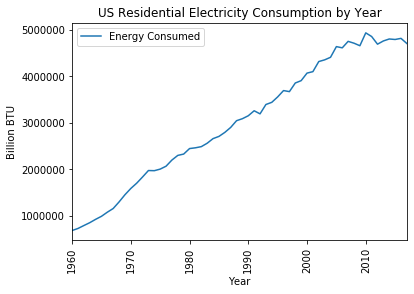

In [9]:
graph = sorted_data.plot(kind='line', figsize=(6,4), x='Year',
                         sort_columns=True, title='US Residential Electricity Consumption by Year')
plt.xticks(rotation=90)
plt.ylabel('Billion BTU')
plt.xlabel('Year')
plt.show()

# Residential Natural Gas Consumption Annually

In [10]:
#U.S. Natural Gas Residential Consumption, Annual
#https://www.eia.gov/opendata/qb.php?category=40553&sdid=SEDS.NGRCB.US.A
#OLD: https://www.eia.gov/opendata/qb.php?category=479755&sdid=NG.N3010US2.A
#OLD: resident_naturalgas = '&series_id=NG.N3010US2.A'
resident_naturalgas = '&series_id=SEDS.NGRCB.US.A'

In [11]:
response_resident_naturalgas = requests.get(url + api_key + resident_naturalgas).json()
print(json.dumps(response_resident_naturalgas, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "SEDS.NGRCB.US.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2017",
                    4591820
                ],
                [
                    "2016",
                    4525157
                ],
                [
                    "2015",
                    4794495
                ],
                [
                    "2014",
                    5257900
                ],
                [
                    "2013",
                    5037081
                ],
                [
                    "2012",
                    4252794
                ],
                [
                    "2011",
                    4817368
                ],
                [
                    "2010",
                    4887375
                ],
                [
                    "2009",
                    4899378
       

In [12]:
response_naturalgas_data = response_resident_naturalgas['series']
data_list_naturalgas = []

for item in response_naturalgas_data:
    data_list_naturalgas.append(item['data'])

data_list_naturalgas[0][0][1]

4591820

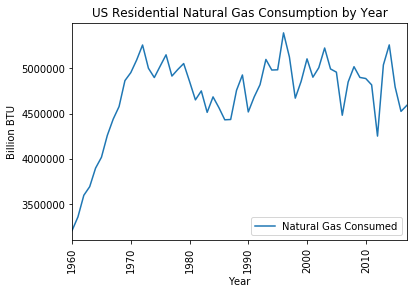

In [13]:
year_naturalgas=[]
naturalgas_consumed=[]

for i in range(len(data_list_naturalgas[0])):
    year_naturalgas.append(data_list_naturalgas[0][i][0])
    naturalgas_consumed.append(data_list_naturalgas[0][i][1])

df_naturalgas_data = pd.DataFrame({'Year':year_naturalgas, 'Natural Gas Consumed':naturalgas_consumed})
sorted_naturalgas_data = df_naturalgas_data.sort_values('Year', ascending='True')
sorted_naturalgas_data.head()

graph_naturalgas = sorted_naturalgas_data.plot(kind='line', figsize=(6,4), x='Year',
                         sort_columns=True, title='US Residential Natural Gas Consumption by Year')
plt.xticks(rotation=90)
plt.ylabel('Billion BTU')
plt.xlabel('Year')
plt.show()

# Residential Electricity Price Annually

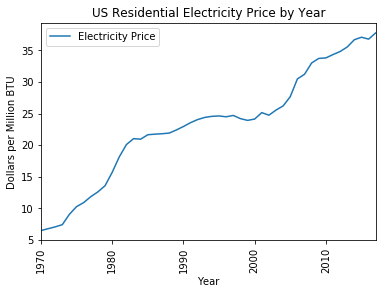

In [14]:
#Electricity Price in Residential Sector
#https://www.eia.gov/opendata/qb.php?category=40662&sdid=SEDS.ESRCD.US.A 
elec_price = '&series_id=SEDS.ESRCD.US.A'

response_elec_price = requests.get(url + api_key + elec_price).json()
#print(json.dumps(response_elec_price, indent=4, sort_keys=True))

response_elecprice_data = response_elec_price['series']
data_list_elecprice = []

for item in response_elecprice_data:
    data_list_elecprice.append(item['data'])

data_list_elecprice[0][0][1]

year_elecprice=[]
electricity_price=[]

for i in range(len(data_list_elecprice[0])):
    year_elecprice.append(data_list_elecprice[0][i][0])
    electricity_price.append(data_list_elecprice[0][i][1])

df_elecprice_data = pd.DataFrame({'Year':year_elecprice, 'Electricity Price':electricity_price})
sorted_elecprice_data = df_elecprice_data.sort_values('Year', ascending='True')
sorted_elecprice_data.head()

graph_elecprice = sorted_elecprice_data.plot(kind='line', figsize=(6,4), x='Year',
                         sort_columns=True, title='US Residential Electricity Price by Year')
plt.xticks(rotation=90)
plt.ylabel('Dollars per Million BTU')
plt.xlabel('Year')
plt.show()

# Residential Natrual Gas Price Annually

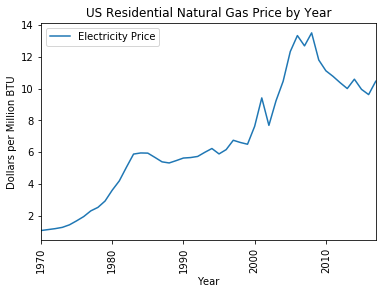

In [15]:
#Natural Gas Price in Residential Sector
#https://www.eia.gov/opendata/qb.php?category=40659&sdid=SEDS.NGRCD.US.A
natgas_price = '&series_id=SEDS.NGRCD.US.A'

response_natgas_price = requests.get(url + api_key + natgas_price).json()
#print(json.dumps(response_natgas_price, indent=4, sort_keys=True))

response_natgasprice_data = response_natgas_price['series']
data_list_natgasprice = []

for item in response_natgasprice_data:
    data_list_natgasprice.append(item['data'])

data_list_natgasprice[0][0][1]

year_natgasprice=[]
naturalgas_price=[]

for i in range(len(data_list_natgasprice[0])):
    year_natgasprice.append(data_list_natgasprice[0][i][0])
    naturalgas_price.append(data_list_natgasprice[0][i][1])

df_natgasprice_data = pd.DataFrame({'Year':year_natgasprice, 'Electricity Price':naturalgas_price})
sorted_natgasprice_data = df_natgasprice_data.sort_values('Year', ascending='True')
sorted_natgasprice_data.head()

graph_natgasprice = sorted_natgasprice_data.plot(kind='line', figsize=(6,4), x='Year',
                         sort_columns=True, title='US Residential Natural Gas Price by Year')
plt.xticks(rotation=90)
plt.ylabel('Dollars per Million BTU')
plt.xlabel('Year')
plt.show()